In [71]:
library(pacman)
library(DBI)
library(dplyr)
library(tidyr)
library(ggplot2)
library(stringr)
library(tidyverse)
#install.packages("tidy")
#library(modelr)
#library(broom)
install.packages("mice")
#install.packages("randomForest")
library(mice)
library(randomForest)
library(car)
library(rpart)
library(caTools)
library(ROCR)
library(lmtest)
library(corrplot)
library(factoextra)
library(kmeans)
options(scipen=999)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
install.packages('pacman')
install.packages('DBI')
install.packages('dplyr')
install.packages('tidyr')
install.packages('ggplot2')
install.packages('stringr')
install.packages('tidyverse')
install.packages('mice')
install.packages('tidy')
install.packages('mice')
install.packages('randomForest')
install.packages('car')
install.packages('rpart')
install.packages('caTools')
install.packages('ROCR')
install.packages("factoextra")
options(scipen = 999)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘tidy’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patc

In [46]:
install.packages("corrplot")
install.packages("lmtest")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [18]:
set.seed(101)

#setwd("/home/turzo/Downloads/Data Analytics /data analytics/Project_final")
data<-read.csv("/content/Indian Liver Patient Dataset (ILPD).csv")
str(data)

#If want to remove missing values

# List out the rows with missing values
data[rowSums(is.na(data)) > 0,]
# Remove the rows with missing values to avoid discrepencies
data <- data[complete.cases(data), ]

#Look at the missing values and deal with them. Run the section if someone wants to predict the missing values

sprintf("Missing values in columns) : %s",
        colnames(data)[colSums(is.na(data)) > 0])
#If we do not want to remove the missing values: 1. We will predict the missing values based on Random Forest and 2. then replace them.
miceImputation <- mice(data[,!names(data) %in% "medv"], method="rf")  # Create a MICE imputation #object based on Random Forest for each column on the dataset.
data <- complete(miceImputation) 

'data.frame':	583 obs. of  11 variables:
 $ Age    : int  65 62 62 58 72 46 26 29 17 55 ...
 $ Gender : chr  "Female" "Male" "Male" "Male" ...
 $ TB     : num  0.7 10.9 7.3 1 3.9 1.8 0.9 0.9 0.9 0.7 ...
 $ DB     : num  0.1 5.5 4.1 0.4 2 0.7 0.2 0.3 0.3 0.2 ...
 $ Alkphos: int  187 699 490 182 195 208 154 202 202 290 ...
 $ Sgpt   : int  16 64 60 14 27 19 16 14 22 53 ...
 $ Sgot   : int  18 100 68 20 59 14 12 11 19 58 ...
 $ TP     : num  6.8 7.5 7 6.8 7.3 7.6 7 6.7 7.4 6.8 ...
 $ ALB    : num  3.3 3.2 3.3 3.4 2.4 4.4 3.5 3.6 4.1 3.4 ...
 $ A.G    : num  0.9 0.74 0.89 1 0.4 1.3 1 1.1 1.2 1 ...
 $ Problem: int  1 1 1 1 1 1 1 1 2 1 ...


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A.G,Problem
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
210,45,Female,0.9,0.3,189,23,33,6.6,3.9,NA,1
242,51,Male,0.8,0.2,230,24,46,6.5,3.1,NA,1
254,35,Female,0.6,0.2,180,12,15,5.2,2.7,NA,2
313,27,Male,1.3,0.6,106,25,54,8.5,4.8,NA,2


character(0)


 iter imp variable
  1   1
  1   2
  1   3
  1   4
  1   5
  2   1
  2   2
  2   3
  2   4
  2   5
  3   1
  3   2
  3   3
  3   4
  3   5
  4   1
  4   2
  4   3
  4   4
  4   5
  5   1
  5   2
  5   3
  5   4
  5   5


Warning message:
“Number of logged events: 1”


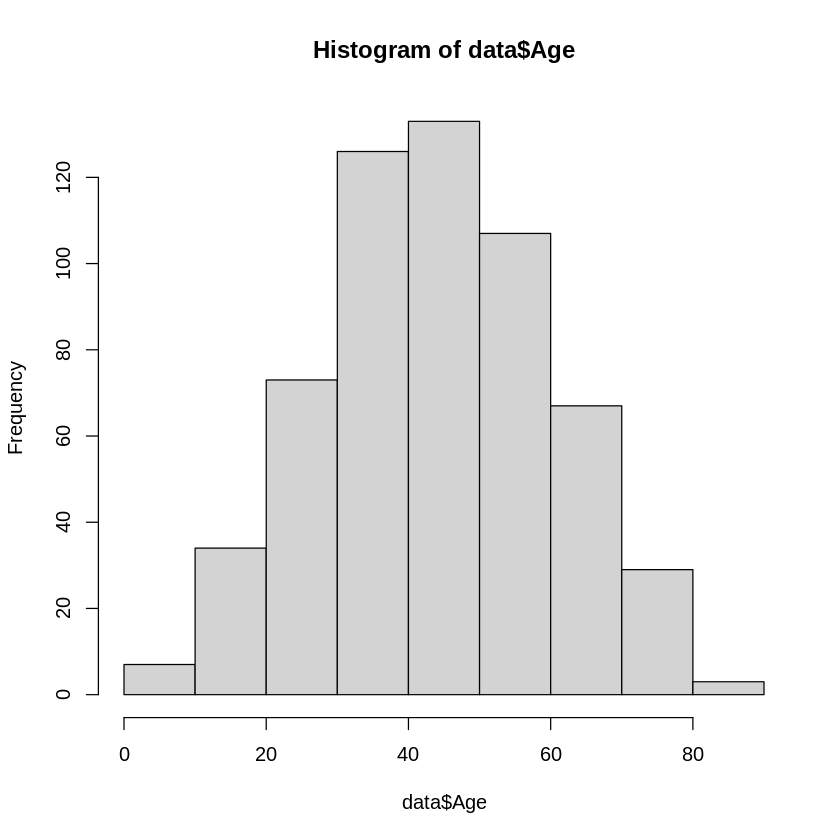

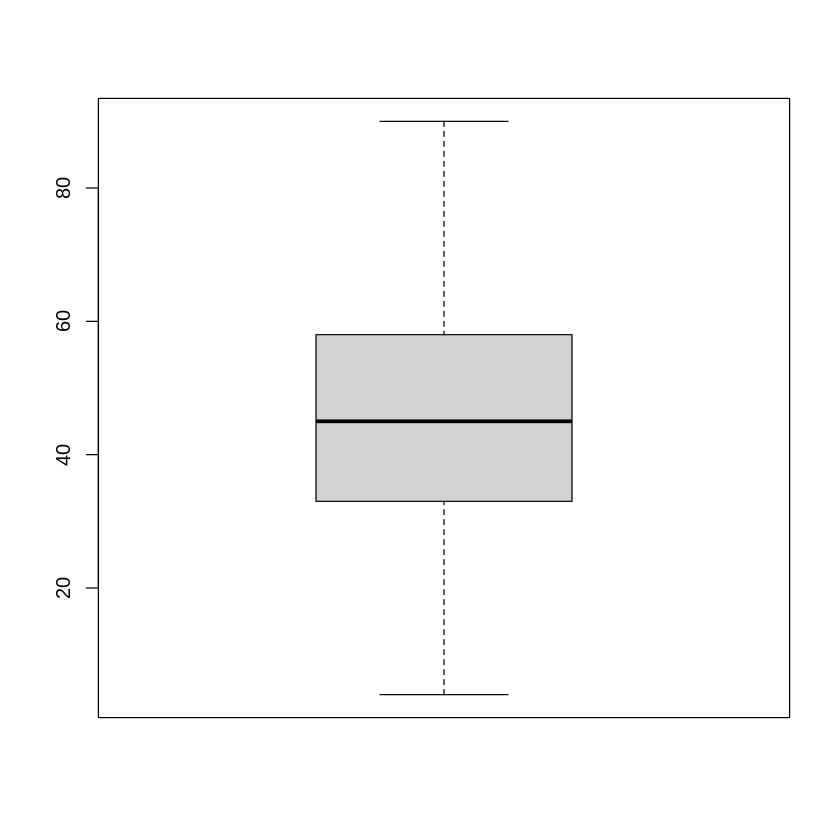

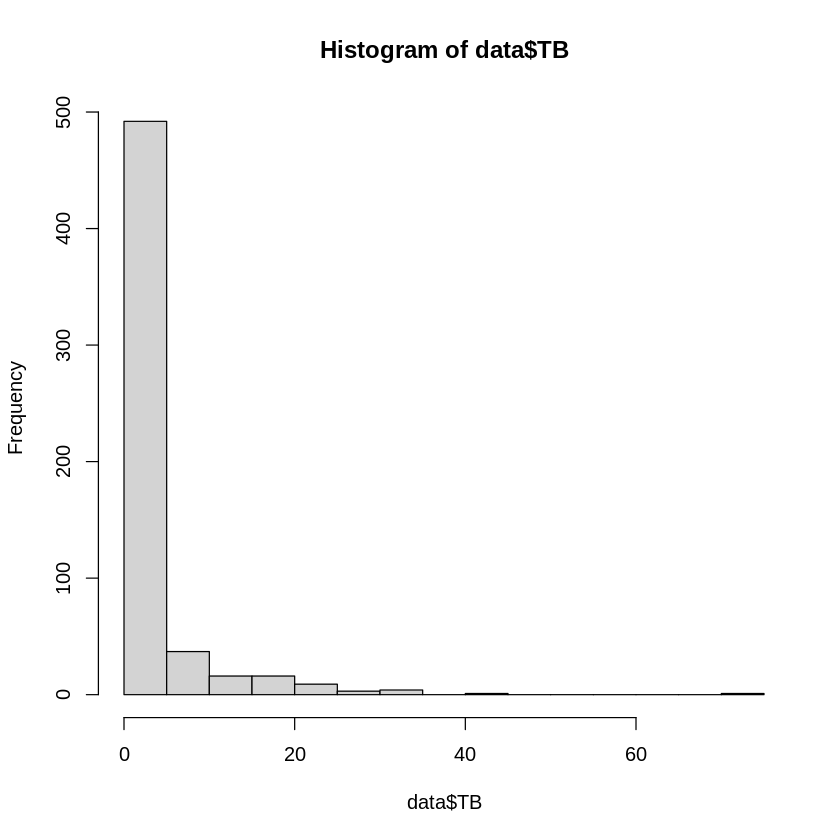

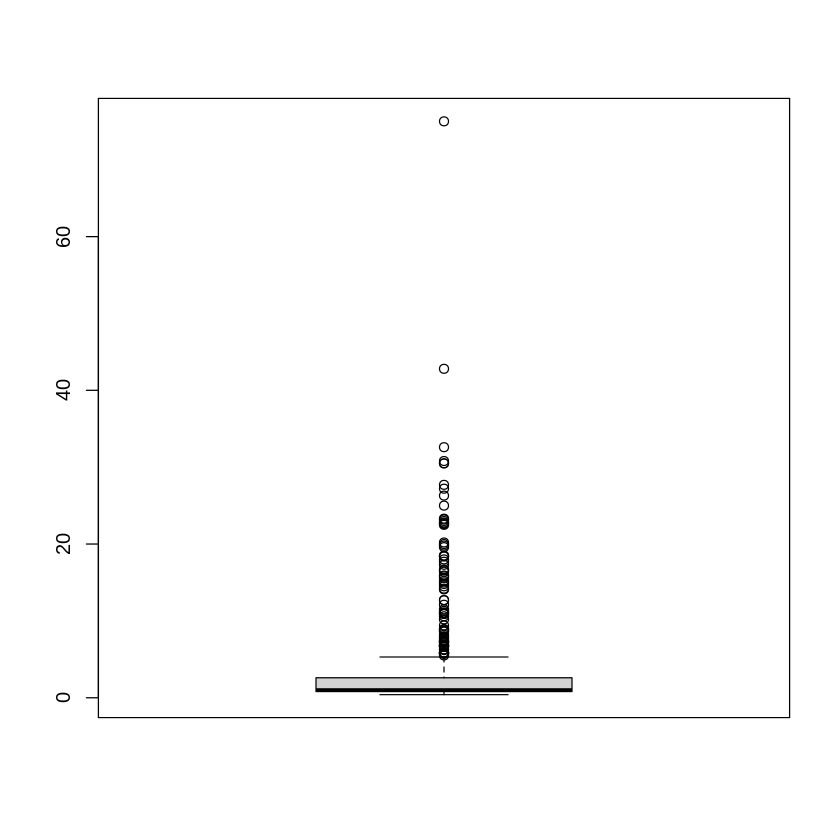

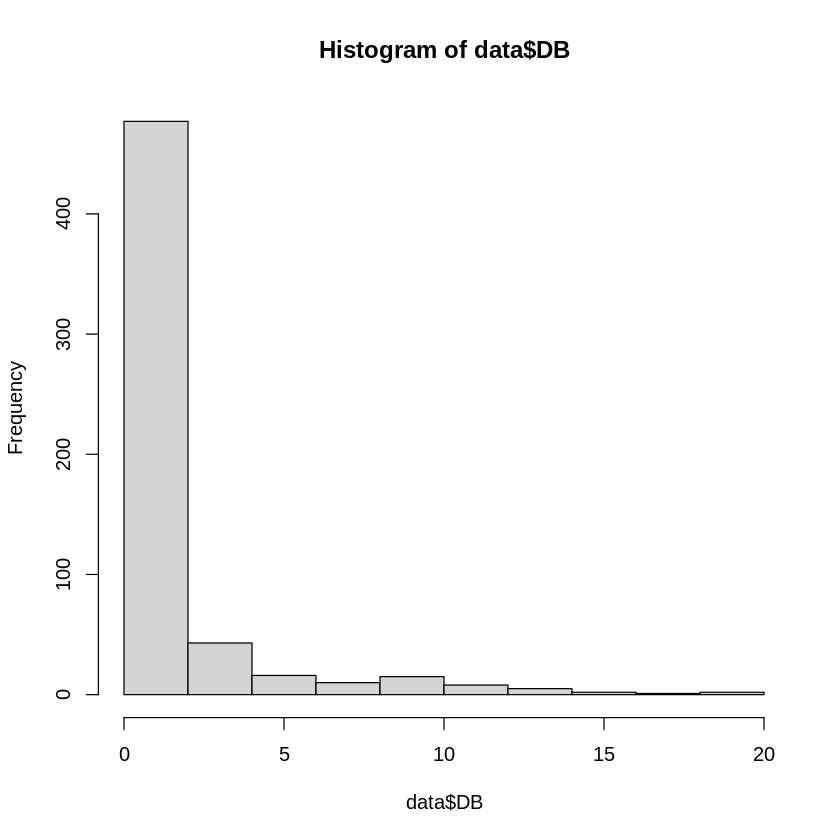

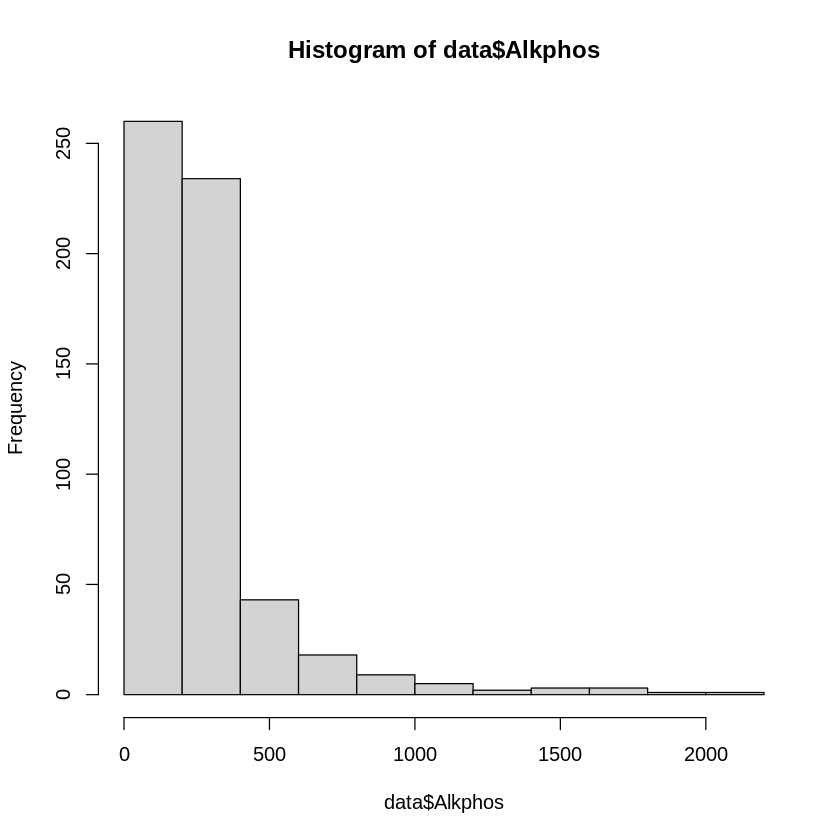

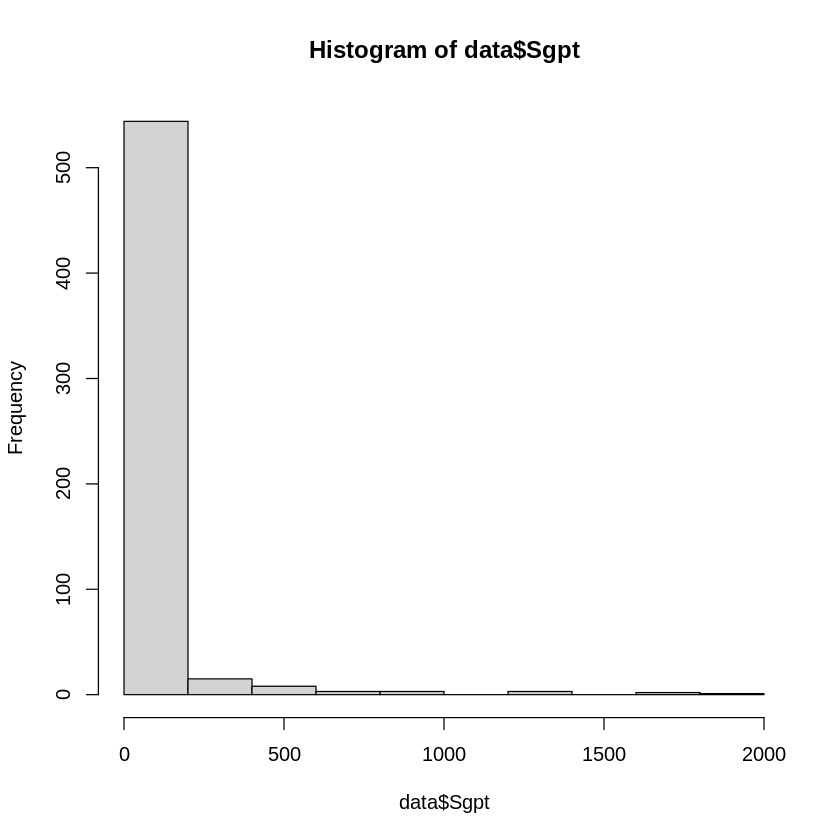

In [21]:
#Exploratory analysis of the data

#Check the distribution of variables
hist(data$Age)
boxplot(data$Age)#No outliers
hist(data$TB)#this data is left skewd
boxplot(data$TB)#Contains outliers
hist(data$DB)#This data is also left skewd
hist(data$Alkphos)#left skewd
hist(data$Sgpt)#left skewed


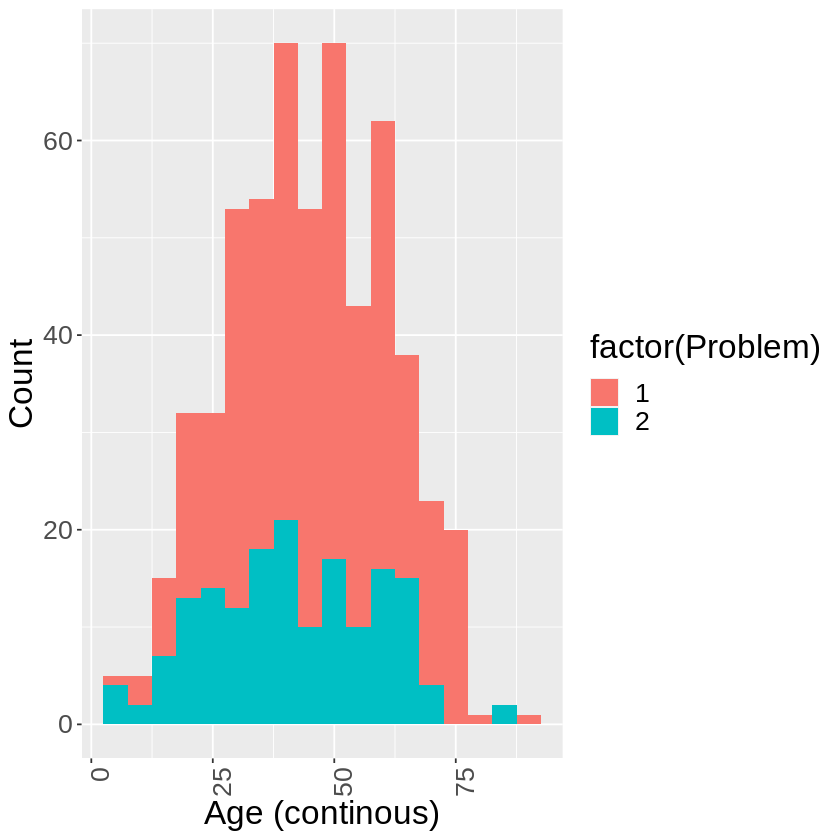

In [22]:
#Now we will do exploratory data analysis
#Check the trend of all patients according to age
data%>%ggplot(aes(x=Age,fill=factor(Problem)))+
  geom_histogram(binwidth = 5)+
  labs(y="Count",x="Age (continous)")+ theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90, hjust=1)) 
#ggsave("0.png")


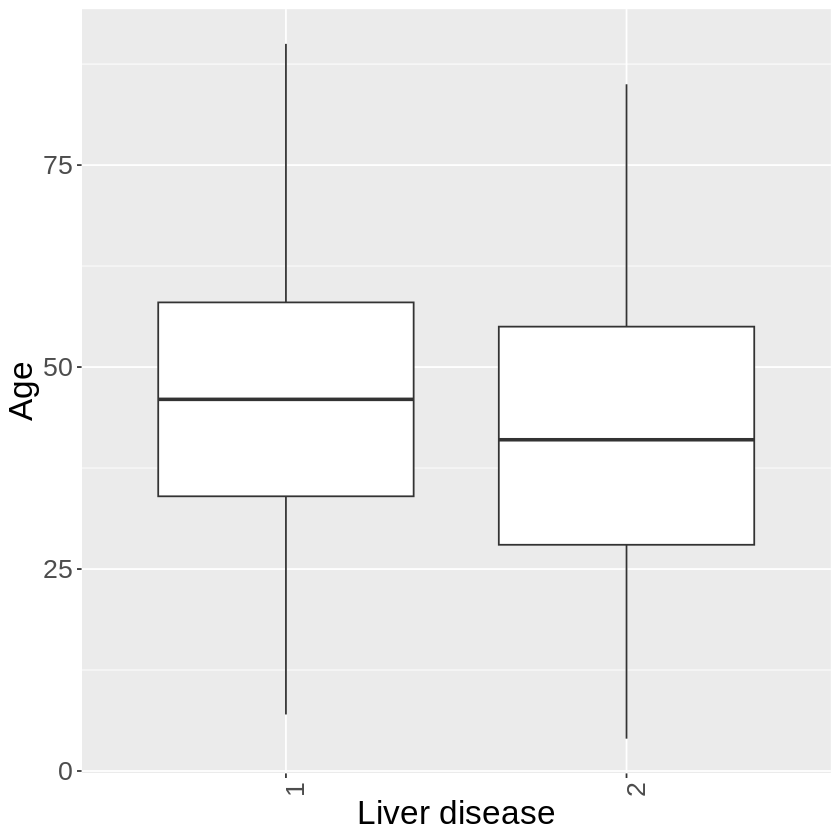

In [23]:
#Seems that liver patient ratio against the total population is higher in the older aged people 
#Now let's do a boxplot to visualize the outlier and the data overall distribution against liver patient or non liver patient
data%>%ggplot(aes(x=factor(Problem),y=Age))+
  geom_boxplot()+
  labs(y="Age",x="Liver disease") + theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90, hjust=1)) 

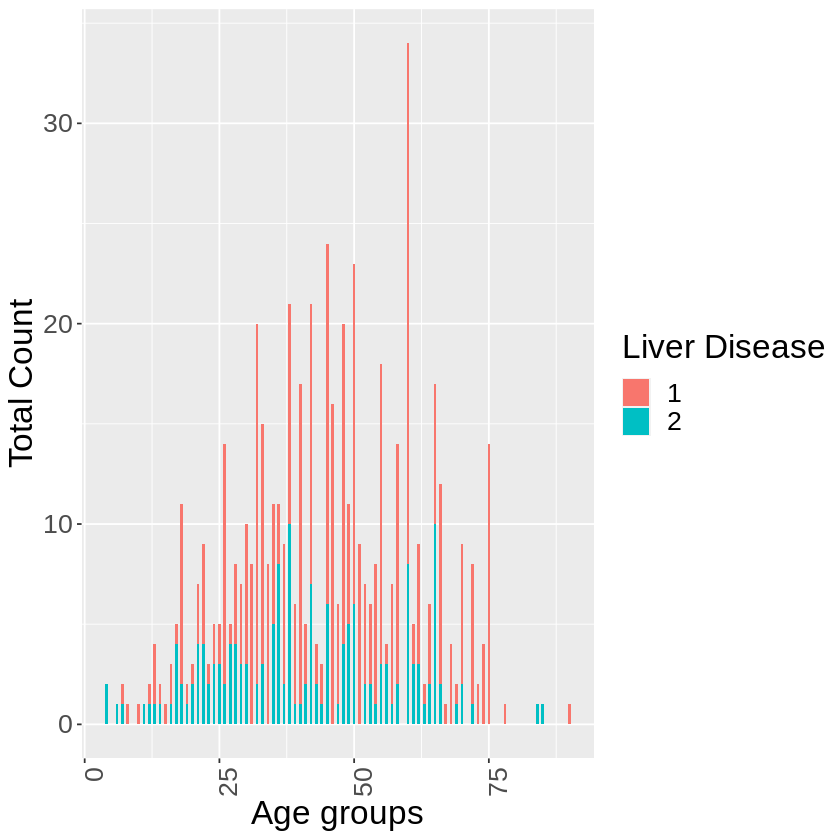

In [24]:
#Seems the albumin and globulin ration tends to be higher in the non patient category, means liver disease patients have a lower albumin
#and globulin ration than the non diseased category
#Turn the age variable into a categorical variable for further analysis
ggplot(data,aes(x=Age,fill=factor(Problem)))+
  geom_bar(width=0.5)+
  xlab("Age groups")+
  ylab("Total Count")+
  labs(fill="Liver Disease")+ theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90, hjust=1)) 
#ggsave("3.png")

[1] "Female" "Male"   "Male"   "Male"   "Male"   "Male"   "Female" "Female"
  [9] "Male"   "Male"   "Male"   "Male"   "Male"   "Female" "Male"   "Male"  
 [17] "Male"   "Male"   "Female" "Female" "Male"   "Male"   "Male"   "Male"  
 [25] "Male"   "Male"   "Male"   "Male"   "Male"   "Female" "Male"   "Male"  
 [33] "Male"   "Female" "Female" "Male"   "Female" "Female" "Male"   "Male"  
 [41] "Male"   "Male"   "Male"   "Male"   "Female" "Male"   "Male"   "Male"  
 [49] "Female" "Male"   "Female" "Female" "Male"   "Male"   "Male"   "Male"  
 [57] "Male"   "Female" "Male"   "Male"   "Female" "Male"   "Male"   "Male"  
 [65] "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Female" "Female"
 [73] "Female" "Male"   "Male"   "Female" "Male"   "Female" "Male"   "Female"
 [81] "Female" "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"  
 [89] "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"  
 [97] "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Female"
[105] "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Female" "Male"  
[113] "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"  
[121] "Male"   "Male"   "Male"   "Female" "Male"   "Male"   "Male"   "Male"  
[129] "Female" "Male"   "Male"   "Female" "Female" "Male"   "Male"   "Male"  
[137] "Female" "Male"   "Male"   "Male"   "Male"   "Female" "Male"   "Male"  
[145] "Female" "Male"   "Female" "Male"   "Male"   "Male"   "Male"   "Male"  
[153] "Female" "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"  
[161] "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Female"
[169] "Male"   "Male"   "Male"   "Female" "Male"   "Male"   "Male"   "Male"  
[177] "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"  
[185] "Male"   "Male"   "Male"   "Male"   "Male"   "Female" "Male"   "Male"  
[193] "Male"   "Male"   "Male"   "Male"   "Male"   "Female" "Male"   "Female"
[201] "Male"   "Male"   "Female" "Male"   "Male"   "Male"   "Male"   "Male"  
[209] "Female" "Male"   "Male"   "Male"   "Female" "Male"   "Male"   "Male"  
[217] "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"  
[225] "Male"   "Male"   "Female" "Female" "Male"   "Male"   "Male"   "Male"  
[233] "Male"   "Female" "Male"   "Male"   "Female" "Female" "Male"   "Male"  
[241] "Female" "Female" "Male"   "Male"   "Male"   "Male"   "Male"   "Male"  
[249] "Male"   "Male"   "Male"   "Female" "Male"   "Male"   "Male"   "Male"  
[257] "Male"   "Male"   "Male"   "Male"   "Female" "Male"   "Male"   "Male"  
[265] "Female" "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Male"  
[273] "Male"   "Male"   "Male"   "Male"   "Female" "Male"   "Male"   "Male"  
[281] "Male"   "Male"   "Male"   "Female" "Male"   "Female" "Male"   "Female"
[289] "Male"   "Male"   "Male"   "Male"   "Male"   "Female" "Female" "Female"
[297] "Female" "Male"   "Female" "Female" "Male"   "Female" "Female" "Male"  
[305] "Male"   "Female" "Female" "Male"   "Female" "Female" "Male"   "Male"  
[313] "Male"   "Male"   "Male"   "Male"   "Female" "Female" "Male"   "Male"  
[321] "Male"   "Male"   "Female" "Male"   "Male"   "Male"   "Male"   "Male"  
[329] "Male"   "Female" "Female" "Female" "Male"   "Male"   "Male"   "Male"  
[337] "Male"   "Female" "Male"   "Male"   "Male"   "Male"   "Male"   "Male"  
[345] "Male"   "Female" "Male"   "Male"   "Female" "Female" "Female" "Male"  
[353] "Male"   "Male"   "Male"   "Female" "Male"   "Female" "Male"   "Female"
[361] "Male"   "Male"   "Male"   "Male"   "Female" "Female" "Female" "Male"  
[369] "Male"   "Female" "Female" "Male"   "Male"   "Female" "Female" "Male"  
[377] "Male"   "Male"   "Female" "Female" "Male"   "Male"   "Male"   "Male"  
[385] "Male"   "Male"   "Male"   "Male"   "Male"   "Male"   "Female" "Male"  
[393] "Male"   "Male"   "Male"   "Male"   "Female" "Male"   "Female" "Male"  
[401] "Male"   "Female" "Male"   "Male"   "Male"   "Male"   "Male"   "Female"
[409] "Male"   "Male"   

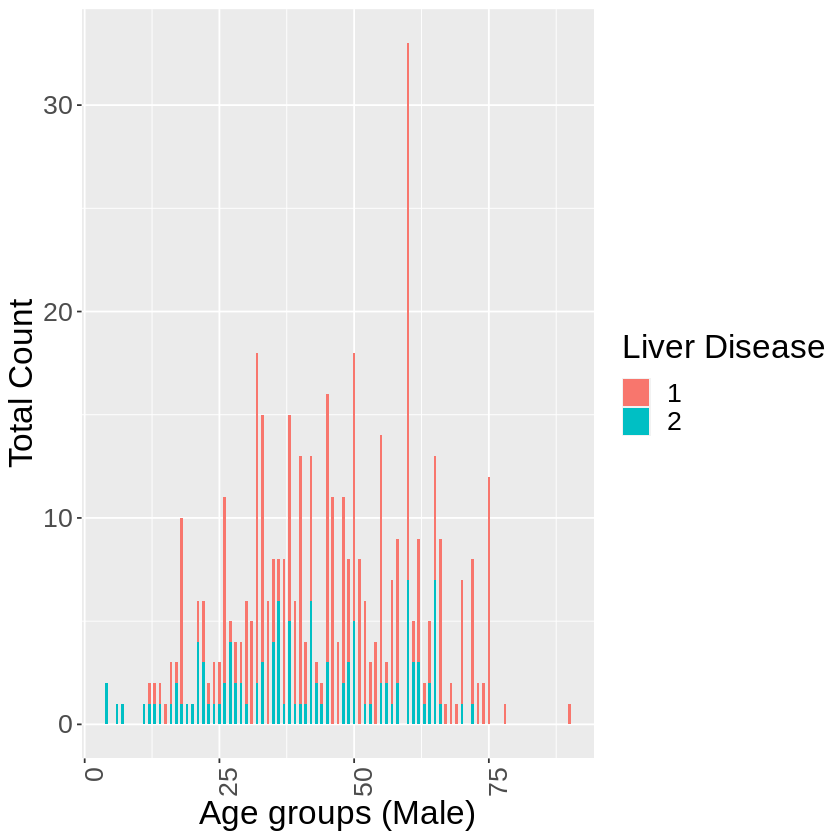

In [25]:
#Now check for male age groups who is more prone to the disease
data$Gender
male_data<-data%>%filter(Gender==("Male"))
male_data%>%
  ggplot()+
  aes(x=Age,fill=factor(Problem))+
  geom_bar(width=0.5)+
  xlab("Age groups (Male)")+
  ylab("Total Count")+
  labs(fill="Liver Disease") + theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90, hjust=1)) 
#ggsave("4.png")

'data.frame':	579 obs. of  11 variables:
 $ Age    : int  65 62 62 58 72 46 26 29 17 55 ...
 $ Gender : chr  "Female" "Male" "Male" "Male" ...
 $ TB     : num  0.7 10.9 7.3 1 3.9 1.8 0.9 0.9 0.9 0.7 ...
 $ DB     : num  0.1 5.5 4.1 0.4 2 0.7 0.2 0.3 0.3 0.2 ...
 $ Alkphos: int  187 699 490 182 195 208 154 202 202 290 ...
 $ Sgpt   : int  16 64 60 14 27 19 16 14 22 53 ...
 $ Sgot   : int  18 100 68 20 59 14 12 11 19 58 ...
 $ TP     : num  6.8 7.5 7 6.8 7.3 7.6 7 6.7 7.4 6.8 ...
 $ ALB    : num  3.3 3.2 3.3 3.4 2.4 4.4 3.5 3.6 4.1 3.4 ...
 $ A.G    : num  0.9 0.74 0.89 1 0.4 1.3 1 1.1 1.2 1 ...
 $ Problem: int  1 1 1 1 1 1 1 1 2 1 ...


Saving 6.67 x 6.67 in image


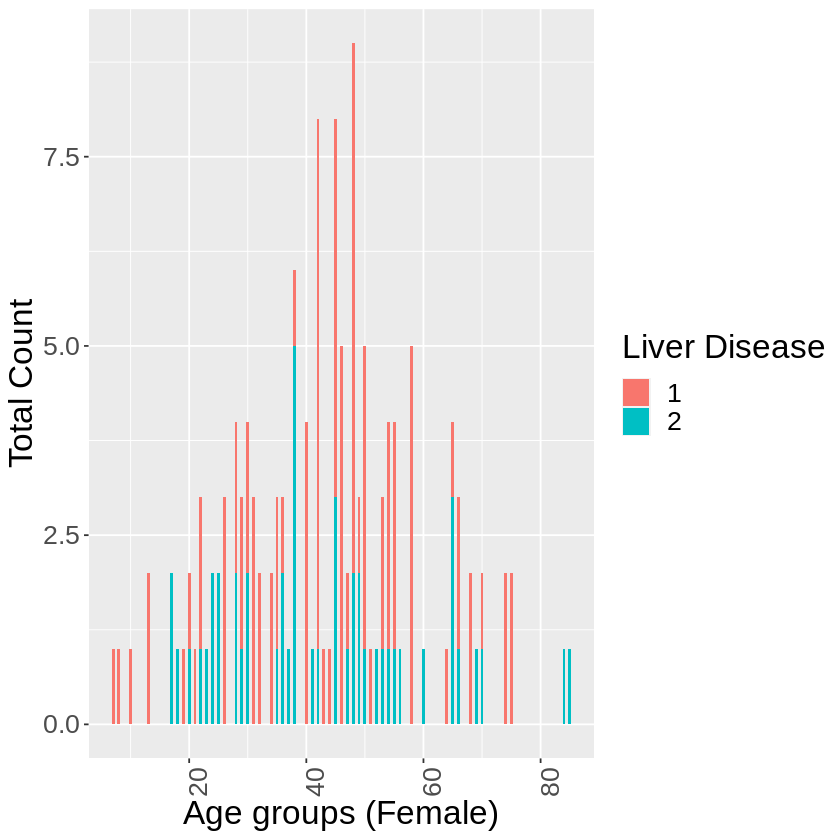

In [26]:
#Check the same for female patients, which group of females are more prone to liver disease?
str(data)
Female_data<-data%>%filter(Gender=="Female")
Female_data%>%
  ggplot()+
  aes(x=Age,fill=factor(Problem))+
  geom_bar(width=0.5)+
  xlab("Age groups (Female)")+
  ylab("Total Count")+
  labs(fill="Liver Disease") + theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90, hjust=1)) 
#ggsave("5.png")

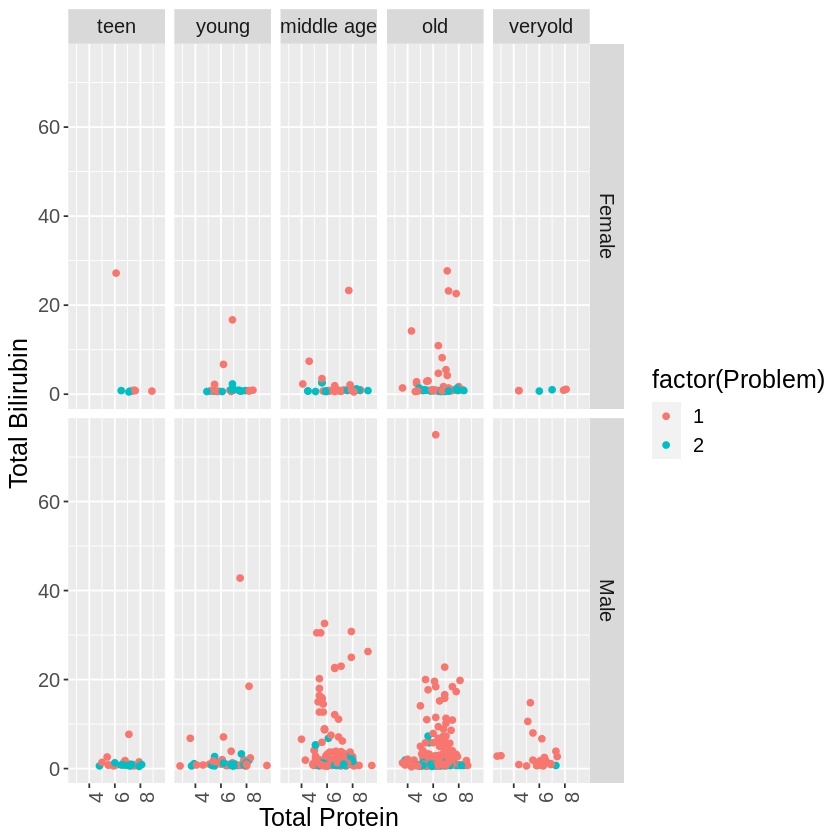

In [27]:
#Turn the age variable into a categorical variable for further analysis
#Before doing this we will backup the original data since we want to break the age variable only in this section
backup_data<-data
data$Age<-cut(data$Age, breaks = c(0,18,30,45,70,100),labels = c("teen","young","middle age","old","veryold"))
#Check the Total protein Vs Total Bilirubin for each age group according to male and female
data%>%ggplot(aes(x=TP,y=TB,color=factor(Problem)))+
  geom_point()+
  facet_grid(Gender~Age)+
  xlab("Total Protein")+
  ylab("Total Bilirubin")+
  labs(fill="Liver disease") + theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1)) 
#ggsave("6.png")

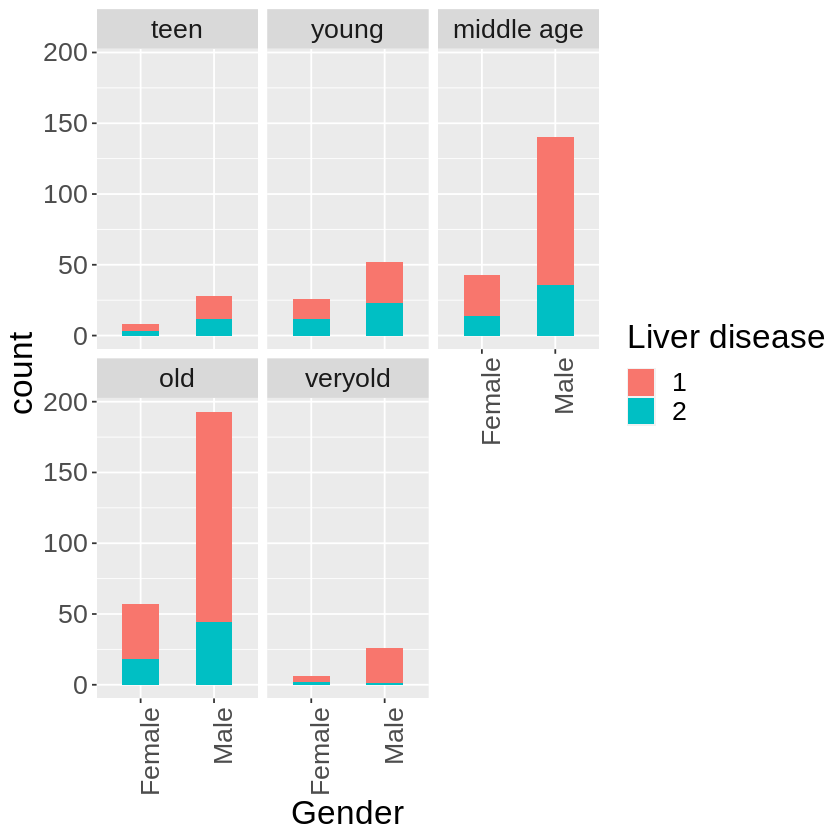

In [28]:
#Increasing number of bilirubin creates liver patient, according to the data visualization
#Now check the both data at the same time for "which group of females are more prone to liver disease?"
data%>%ggplot(aes(x=Gender,fill=factor(Problem)))+
  facet_wrap(~Age)+
  geom_bar(width=0.5)+
  labs(fill="Liver disease") + theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90, hjust=1)) 
#ggsave("7.png")

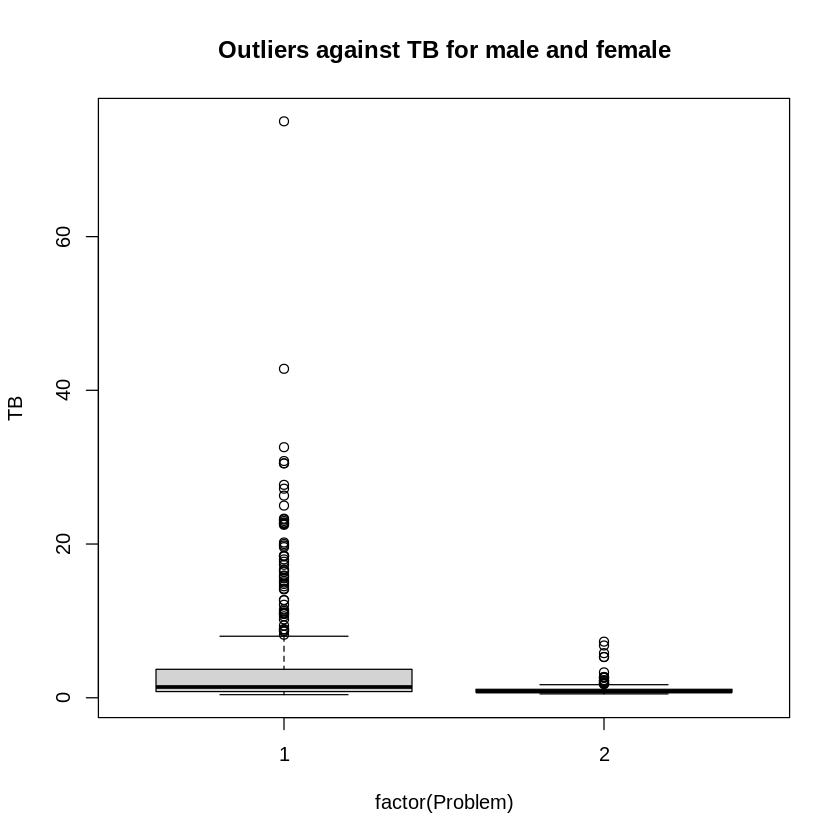

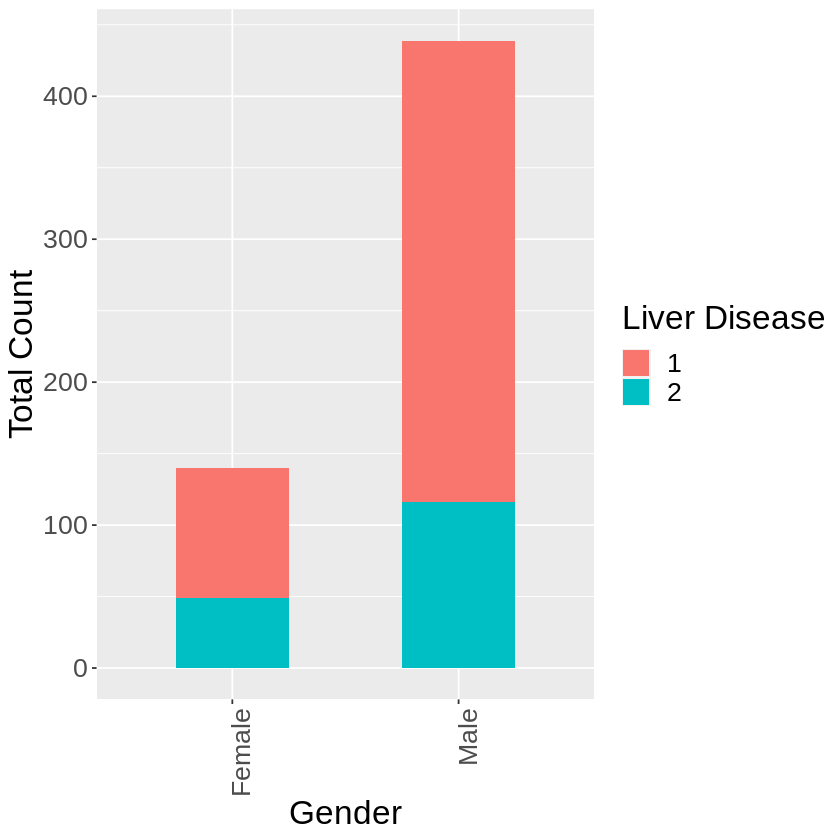

In [29]:
#Check the outliers against TB for male and female
boxplot(TB ~ factor(Problem), data=data, main="Outliers against TB for male and female")
#Check which group has the more patient male or female
data$Gender<-as.factor(data$Gender)
ggplot(data,aes(x=Gender,fill=factor(Problem)))+
  geom_bar(width=0.5)+
  xlab("Gender")+
  ylab("Total Count")+
  labs(fill="Liver Disease") + theme(text = element_text(size=20),
        axis.text.x = element_text(angle=90, hjust=1)) 
#ggsave("8.png")

In [ ]:
#First backup the original data since we have made age categorical in previous section
data<-backup_data
#Since the outcome is a categorical variable not numerical. We have the factorize the categorical outcome, namely variable Problem

In [30]:
data[which(data$Problem==1),'Problem']<-"Patient" # It exchanges with the string "Patient" if the numeric value is 1 
data[which(data$Problem==2),'Problem']<-"Non-Patient" #It exchanges with the string "Non-Patient" if the numeric value is 0
data$Problem<-factor(data$Problem) #Finally factor the Problem variable
str(data)
data$Gender<-factor(data$Gender)

'data.frame':	579 obs. of  11 variables:
 $ Age    : Factor w/ 5 levels "teen","young",..: 4 4 4 4 5 4 2 2 1 4 ...
 $ Gender : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 2 1 1 2 2 ...
 $ TB     : num  0.7 10.9 7.3 1 3.9 1.8 0.9 0.9 0.9 0.7 ...
 $ DB     : num  0.1 5.5 4.1 0.4 2 0.7 0.2 0.3 0.3 0.2 ...
 $ Alkphos: int  187 699 490 182 195 208 154 202 202 290 ...
 $ Sgpt   : int  16 64 60 14 27 19 16 14 22 53 ...
 $ Sgot   : int  18 100 68 20 59 14 12 11 19 58 ...
 $ TP     : num  6.8 7.5 7 6.8 7.3 7.6 7 6.7 7.4 6.8 ...
 $ ALB    : num  3.3 3.2 3.3 3.4 2.4 4.4 3.5 3.6 4.1 3.4 ...
 $ A.G    : num  0.9 0.74 0.89 1 0.4 1.3 1 1.1 1.2 1 ...
 $ Problem: Factor w/ 2 levels "Non-Patient",..: 2 2 2 2 2 2 2 2 1 2 ...


'data.frame':	579 obs. of  11 variables:
 $ Age    : Factor w/ 5 levels "teen","young",..: 4 4 4 4 5 4 2 2 1 4 ...
 $ Gender : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 2 1 1 2 2 ...
 $ TB     : num  0.7 10.9 7.3 1 3.9 1.8 0.9 0.9 0.9 0.7 ...
 $ DB     : num  0.1 5.5 4.1 0.4 2 0.7 0.2 0.3 0.3 0.2 ...
 $ Alkphos: int  187 699 490 182 195 208 154 202 202 290 ...
 $ Sgpt   : int  16 64 60 14 27 19 16 14 22 53 ...
 $ Sgot   : int  18 100 68 20 59 14 12 11 19 58 ...
 $ TP     : num  6.8 7.5 7 6.8 7.3 7.6 7 6.7 7.4 6.8 ...
 $ ALB    : num  3.3 3.2 3.3 3.4 2.4 4.4 3.5 3.6 4.1 3.4 ...
 $ A.G    : num  0.9 0.74 0.89 1 0.4 1.3 1 1.1 1.2 1 ...
 $ Problem: Factor w/ 2 levels "Non-Patient",..: 2 2 2 2 2 2 2 2 1 2 ...


Outliers identified: 84 from 579 observations

Proportion (%) of outliers: 14.5077720207254

Mean of the outliers: 14.8595238095238

Mean without removing outliers: 3.3153713298791

Mean if we remove outliers: 1.35636363636364

Outliers successfully removed


Outliers identified: 81 from 579 observations

Proportion (%) of outliers: 13.9896373056995

Mean of the outliers: 7.31481481481481

Mean without removing outliers: 1.49412780656304

Mean if we remove outliers: 0.547389558232932

Outliers successfully removed




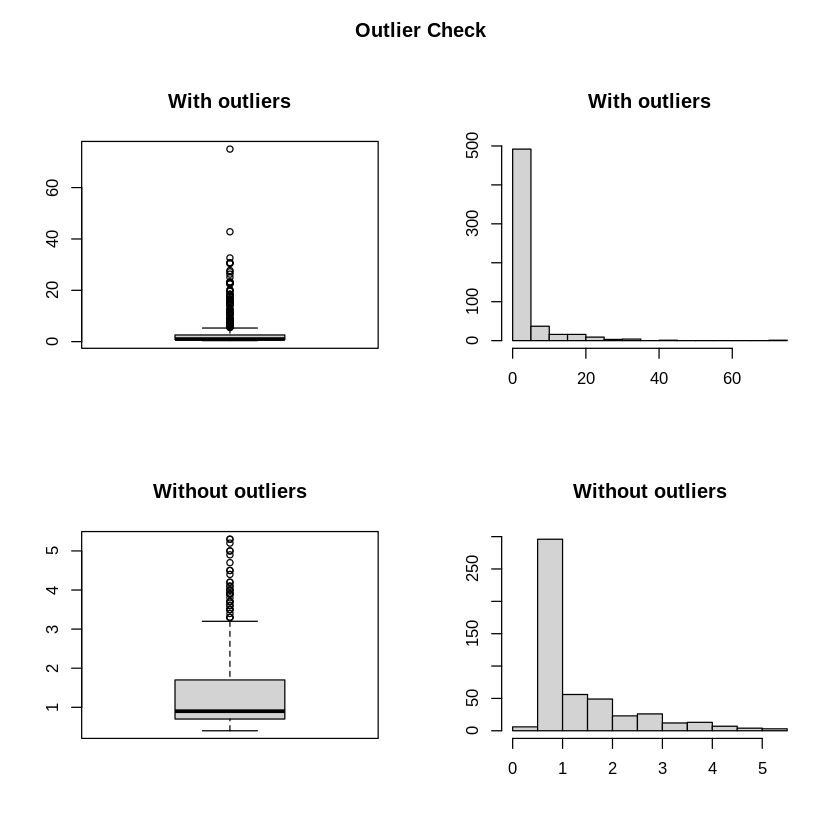

Outliers identified: 69 from 579 observations

Proportion (%) of outliers: 11.9170984455959

Mean of the outliers: 813.95652173913

Mean without removing outliers: 291.366148531952

Mean if we remove outliers: 220.662745098039

Outliers successfully removed




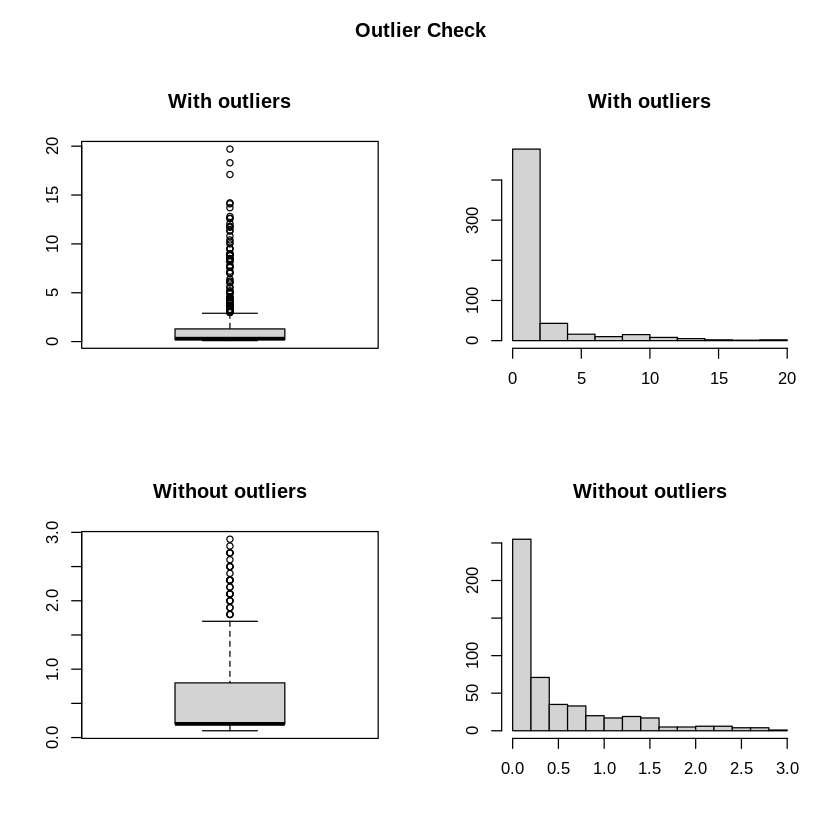

Outliers identified: 72 from 579 observations

Proportion (%) of outliers: 12.4352331606218

Mean of the outliers: 382.486111111111

Mean without removing outliers: 81.126079447323

Mean if we remove outliers: 38.3293885601578

Outliers successfully removed




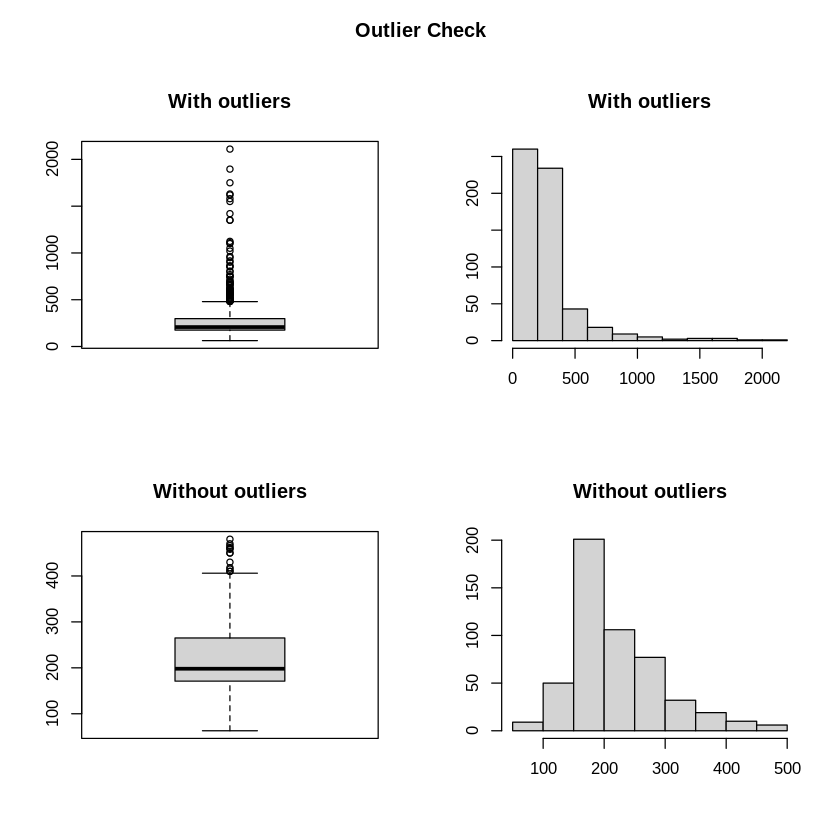

Outliers identified: 66 from 579 observations

Proportion (%) of outliers: 11.3989637305699

Mean of the outliers: 578.181818181818

Mean without removing outliers: 110.414507772021

Mean if we remove outliers: 50.233918128655

Outliers successfully removed




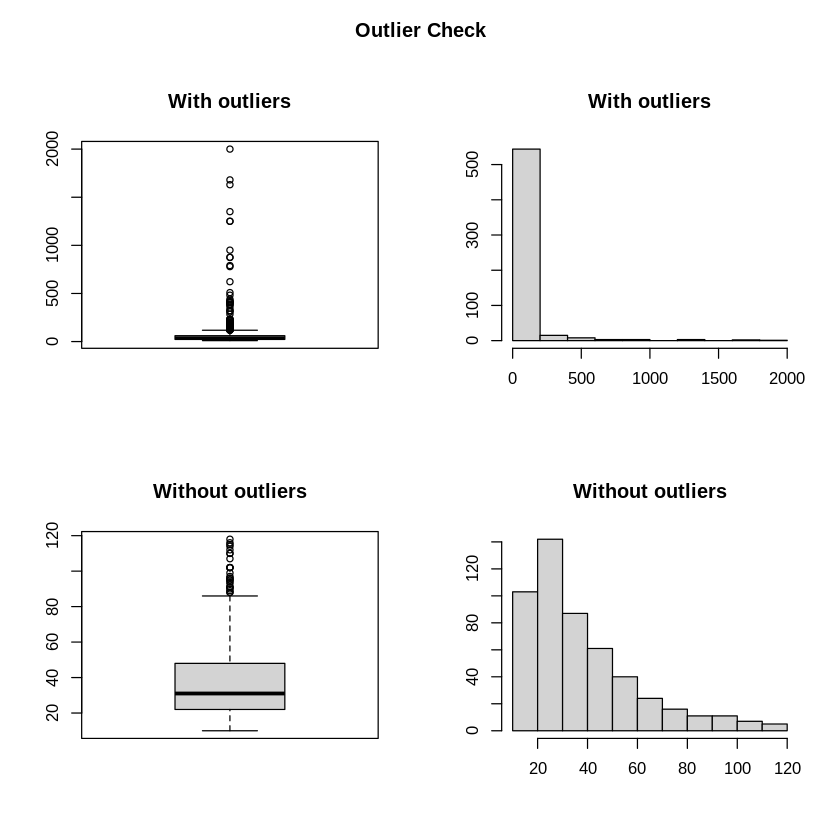

Outliers identified: 8 from 579 observations

Proportion (%) of outliers: 1.38169257340242

Mean of the outliers: 4.8

Mean without removing outliers: 6.48169257340242

Mean if we remove outliers: 6.50525394045534

Outliers successfully removed




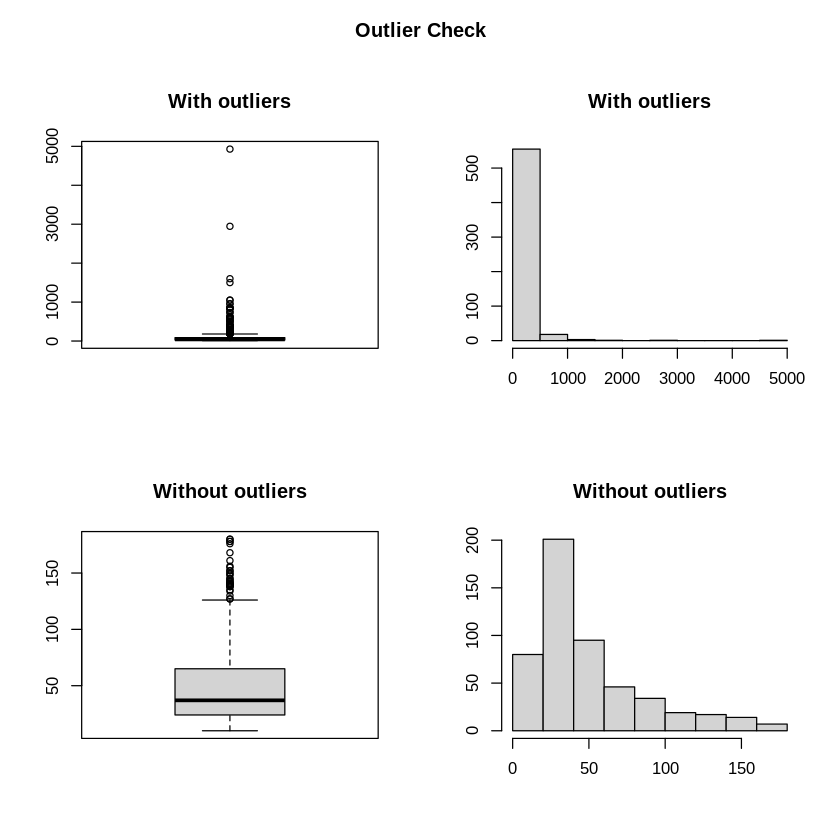

Outliers identified: 0 from 579 observations

Proportion (%) of outliers: 0

Mean of the outliers: NaN

Mean without removing outliers: 3.13851468048359

Mean if we remove outliers: 3.13851468048359

Outliers successfully removed




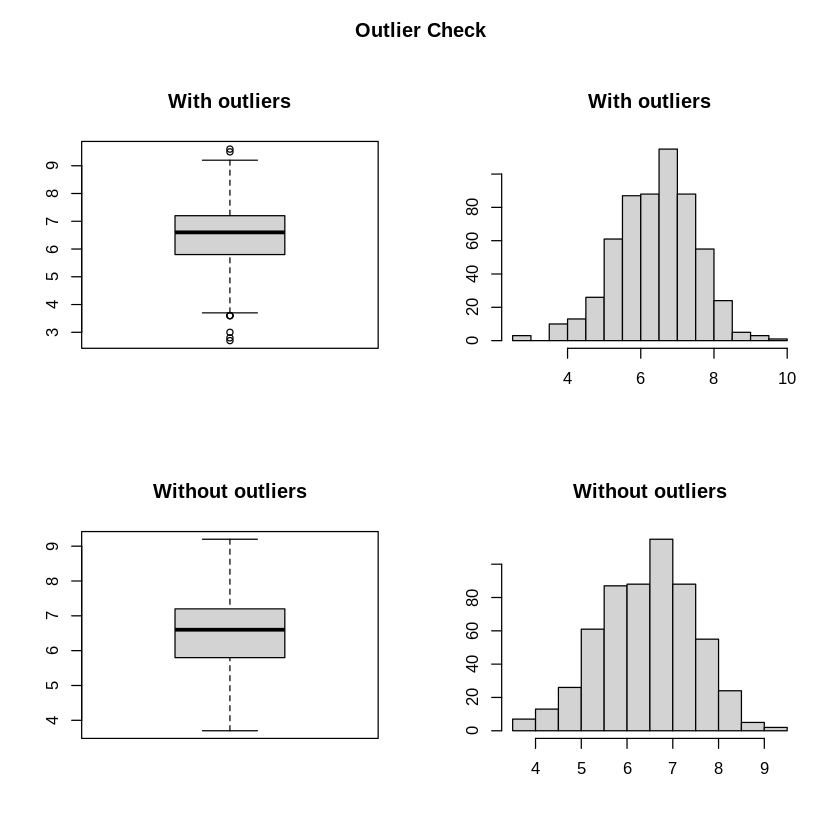

Outliers identified: 10 from 579 observations

Proportion (%) of outliers: 1.72711571675302

Mean of the outliers: 2.052

Mean without removing outliers: 0.94706390328152

Mean if we remove outliers: 0.927644991212654

Outliers successfully removed




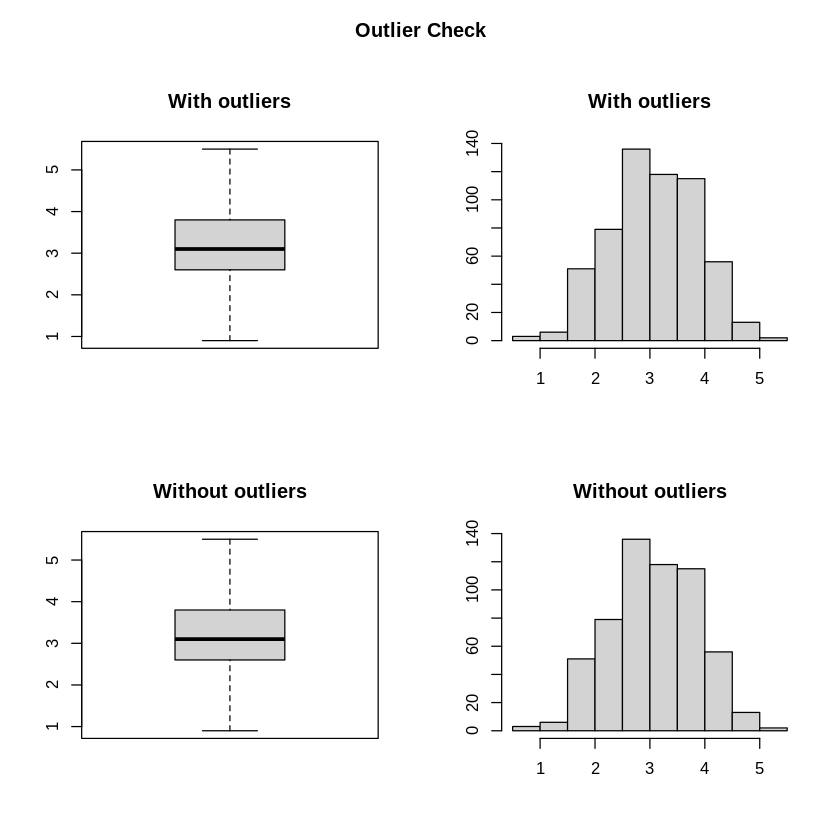

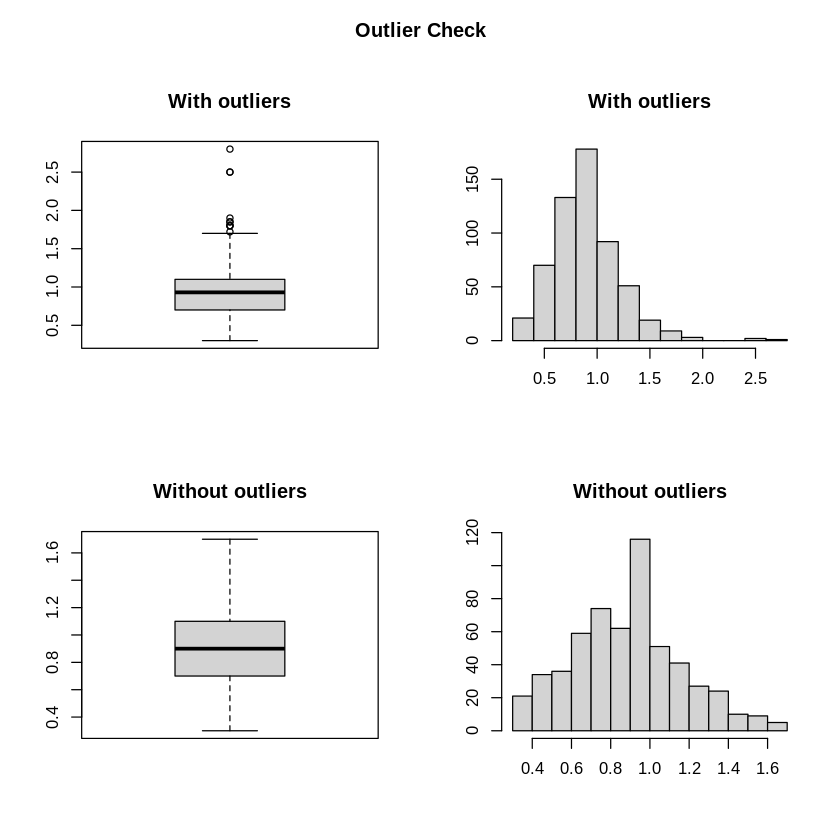

In [34]:
#Since we have noticed outlier in the data, we will now remove the outliers from the data and impute them with predicted values
outlierKD <- function(dt, var) {
  var_name <- eval(substitute(var),eval(dt))
  tot <- sum(!is.na(var_name))
  na1 <- sum(is.na(var_name))
  m1 <- mean(var_name, na.rm = T)
  par(mfrow=c(2, 2), oma=c(0,0,3,0))
  boxplot(var_name, main="With outliers")
  hist(var_name, main="With outliers", xlab=NA, ylab=NA)
  outlier <- boxplot.stats(var_name)$out
  mo <- mean(outlier)
  var_name <- ifelse(var_name %in% outlier, NA, var_name)
  boxplot(var_name, main="Without outliers")
  hist(var_name, main="Without outliers", xlab=NA, ylab=NA)
  title("Outlier Check", outer=TRUE)
  na2 <- sum(is.na(var_name))
  message("Outliers identified: ", na2 - na1, " from ", tot, " observations")
  message("Proportion (%) of outliers: ", (na2 - na1) / tot*100)
  message("Mean of the outliers: ", mo)
  m2 <- mean(var_name, na.rm = T)
  message("Mean without removing outliers: ", m1)
  message("Mean if we remove outliers: ", m2)
  dt[as.character(substitute(var))] <- invisible(var_name)
  assign(as.character(as.list(match.call())$dt), dt, envir = .GlobalEnv)
  message("Outliers successfully removed", "\n")
  return(invisible(dt))
}
#Plot data with potential outliers
# Plot of data with outliers.
#Use outlierKD's parameter as 
str(data)
#outlierKD(data,Age)
outlierKD(data,TB)
outlierKD(data,DB)
outlierKD(data,Alkphos)
outlierKD(data,Sgpt)
outlierKD(data,Sgot)
outlierKD(data,TP)
outlierKD(data,ALB)
outlierKD(data,A.G)
#Check for each outlier manually insert every variable which consists of outlier. To remove them press yes
#Write the dataset with imputed predicted values with MICE for back up
write.csv(data,"my_data_without_outlier.csv")

In [38]:
data

Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A.G,Problem
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
old,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Patient
old,Male,NA,NA,NA,64,100,7.5,3.2,0.74,Patient
old,Male,NA,NA,NA,60,68,7.0,3.3,0.89,Patient
old,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Patient
veryold,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Patient
old,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,Patient
young,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,Patient
young,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,Patient
teen,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,Non-Patient


In [39]:
set.seed(101)
data[rowSums(is.na(data)) > 0,]
data <- data[complete.cases(data), ]
#Now predict the missing values which was removed and write them to our existing data
miceImputation <- mice(data[,!names(data) %in% "medv"], method="rf")  # Create a MICE imputation #object based on Random Forest for each column on the dataset.
data <- complete(miceImputation) 
write.csv(data,"Imputed_data.csv")

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A.G,Problem
,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>
2,old,Male,NA,NA,NA,64,100,7.5,3.2,0.74,Patient
3,old,Male,NA,NA,NA,60,68,7.0,3.3,0.89,Patient
17,middle age,Male,1.8,0.8,342,NA,NA,7.6,4.4,1.30,Patient
19,middle age,Female,0.9,0.3,293,NA,NA,6.8,3.1,0.80,Patient
20,middle age,Female,0.9,0.3,293,NA,NA,6.8,3.1,0.80,Patient
21,old,Male,2.2,1.0,NA,17,28,7.3,2.6,0.55,Patient
22,old,Male,2.9,1.3,NA,22,34,7.0,2.4,0.50,Patient
23,old,Male,NA,NA,NA,116,66,6.4,3.1,0.90,Patient
25,old,Male,0.9,0.2,194,52,45,6.0,3.9,NA,Non-Patient



 iter imp variable
  1   1
  1   2
  1   3
  1   4
  1   5
  2   1
  2   2
  2   3
  2   4
  2   5
  3   1
  3   2
  3   3
  3   4
  3   5
  4   1
  4   2
  4   3
  4   4
  4   5
  5   1
  5   2
  5   3
  5   4
  5   5


,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A.G
TB,1.00000000,0.96997132,0.18468184,0.21643990,0.3358881,-0.05950272,-0.21345217,-0.2622379
DB,0.96997132,1.00000000,0.18439135,0.17367387,0.3016637,-0.03584055,-0.20737188,-0.2706852
Alkphos,0.18468184,0.18439135,1.00000000,0.24069533,0.2097026,0.03869089,-0.06974019,-0.1873464
Sgpt,0.21643990,0.17367387,0.24069533,1.00000000,0.6030142,-0.05447673,-0.01083039,0.0339673
Sgot,0.33588813,0.30166370,0.20970263,0.60301423,1.0000000,-0.15605537,-0.19046252,-0.1394747
TP,-0.05950272,-0.03584055,0.03869089,-0.05447673,-0.1560554,1.00000000,0.83525981,0.2895231
ALB,-0.21345217,-0.20737188,-0.06974019,-0.01083039,-0.1904625,0.83525981,1.00000000,0.7516099
A.G,-0.26223788,-0.27068519,-0.18734641,0.03396730,-0.1394747,0.28952305,0.75160993,1.0000000


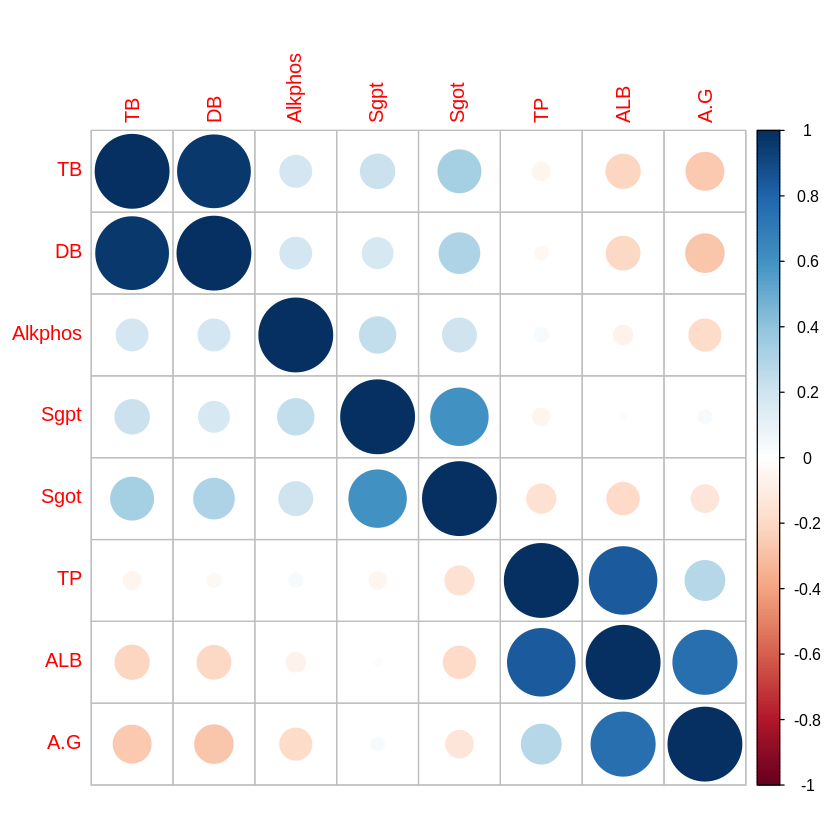

In [45]:

#Scale the existing dataset
data<-data %>% mutate_each_(funs(scale),vars=c("TB","DB","Alkphos","Sgpt","Sgot","TP","ALB","A.G"))


#Find out the highly correlated values, since we want to remove them to do logistic regression reduced model

#Find out the Highly correlated values since multiple highly correlated variable is not necessery in the model, we should try to minimize the highly correlated variables 
df <- data[,c("TB","DB","Alkphos","Sgpt","Sgot","TP","ALB","A.G")]
cor(df)  # correlation matrix
M <- cor(df)
#install.packages("corrplot")
par(mfrow=c(1,1))
corrplot(M)  # visualization of correlation matrix

In [50]:

#Build a full model and a reduced model for comparison purpose

#Full model
logistic_model1 <- glm(Problem ~ .,family=binomial
                      (link='logit'),data=data)
#logistic_model1 <- glm(Problem ~ .-A.G,family=binomial
#                       (link='logit'),data=data)
logistic_model2 <- glm(Problem ~ Age + DB + Alkphos + Sgpt + Sgot + TP + ALB  ,family=binomial
                       (link='logit'),data=data)
install.packages("lmtest")
library(lmtest)
lrtest(logistic_model1, logistic_model2)
#Since if we remove TB and A.G (As they are more correlated with variables DB and Sgpt) removing them makes the reduced model not very statistically
#different since testing both model shows a p value greater than 0.05. Since two models are equally likely there is no point of using the full model.

#Split the dataset into training set and testset for both the reduced model and full model. training_reduced and test_reduced will be consisted with the reduced variables. On the other hand training, testing will consist of the full model training and testing set

split<-sample.split(data,SplitRatio = 0.8)
training<-subset(data,split==T)
testing<- subset(data,split==F)
training_reduced<-training[,-c(3,10)]
testing_reduced<-testing[,-c(3,10)]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,-234.2429,NA,NA,NA
2,11,-241.1504,-3,13.81516,0.003167861


In [51]:
#```
#Build up the model with the training set
#
reduced_model <- glm (Problem ~ ., data = training_reduced, family = binomial)
full_model<-glm(Problem~.,data=training,family = binomial)
summary(reduced_model)
summary(full_model)


Call:
glm(formula = Problem ~ ., family = binomial, data = training_reduced)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1648  -1.1200   0.5509   1.0081   1.6577  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -0.12888    0.61267  -0.210   0.8334  
Ageyoung       0.05240    0.65865   0.080   0.9366  
Agemiddle age  0.50609    0.62036   0.816   0.4146  
Ageold         1.08720    0.61116   1.779   0.0753 .
Ageveryold     2.92218    1.20630   2.422   0.0154 *
GenderMale     0.01371    0.31799   0.043   0.9656  
DB             0.33839    0.18908   1.790   0.0735 .
Alkphos        0.40270    0.17591   2.289   0.0221 *
Sgpt           0.24855    0.18546   1.340   0.1802  
Sgot           0.06329    0.18849   0.336   0.7370  
TP             0.41297    0.26431   1.562   0.1182  
ALB           -0.37109    0.27670  -1.341   0.1799  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial f


Call:
glm(formula = Problem ~ ., family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1512  -1.0927   0.5074   0.9754   1.6607  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)   -0.01814    0.62734  -0.029  0.97693   
Ageyoung       0.16579    0.66832   0.248  0.80408   
Agemiddle age  0.56241    0.63025   0.892  0.37220   
Ageold         1.05889    0.61920   1.710  0.08725 . 
Ageveryold     3.14205    1.21914   2.577  0.00996 **
GenderMale    -0.10887    0.32387  -0.336  0.73676   
TB            -0.27370    0.62175  -0.440  0.65979   
DB             0.60524    0.64191   0.943  0.34574   
Alkphos        0.47437    0.18101   2.621  0.00878 **
Sgpt           0.29326    0.19047   1.540  0.12365   
Sgot           0.01754    0.18881   0.093  0.92596   
TP             2.39191    0.85305   2.804  0.00505 **
ALB           -3.33586    1.23797  -2.695  0.00705 **
A.G            1.66820    0.67273   2.480  0.

In [52]:
# ```
# Test both models using the test sets
# ```{r}
#Test both of the models using test set
test_predicted_full_model<-predict(full_model,newdata = testing,type = "response")
test_predicted_reduced_model<-predict(reduced_model,newdata = testing_reduced,type="response")
#list confusion matrix for both models
list(full_model_conf=table(testing$Problem, test_predicted_full_model>0.5)%>%prop.table()%>%round(3),
     reduced_model_conf=table(testing_reduced$Problem,test_predicted_reduced_model>0.5)%>%prop.table()%>%round(3))
#First the full model confusion metrix
table(test_predicted_full_model > 0.5,testing$Problem)
#Now the reduced model confusion metrix
table(test_predicted_reduced_model > 0.5,testing_reduced$Problem)

$full_model_conf
             
              FALSE  TRUE
  Non-Patient 0.121 0.271
  Patient     0.140 0.467

$reduced_model_conf
             
              FALSE  TRUE
  Non-Patient 0.093 0.299
  Patient     0.140 0.467


       
        Non-Patient Patient
  FALSE          13      15
  TRUE           29      50

       
        Non-Patient Patient
  FALSE          10      15
  TRUE           32      50

$full_model_conf
             
              FALSE  TRUE
  Non-Patient 0.121 0.271
  Patient     0.140 0.467

$reduced_model_conf
             
              FALSE  TRUE
  Non-Patient 0.093 0.299
  Patient     0.140 0.467


       
        Non-Patient Patient
  FALSE          13      15
  TRUE           29      50

[[1]]
[1] 0.6355311

[[1]]
[1] 0.5989011

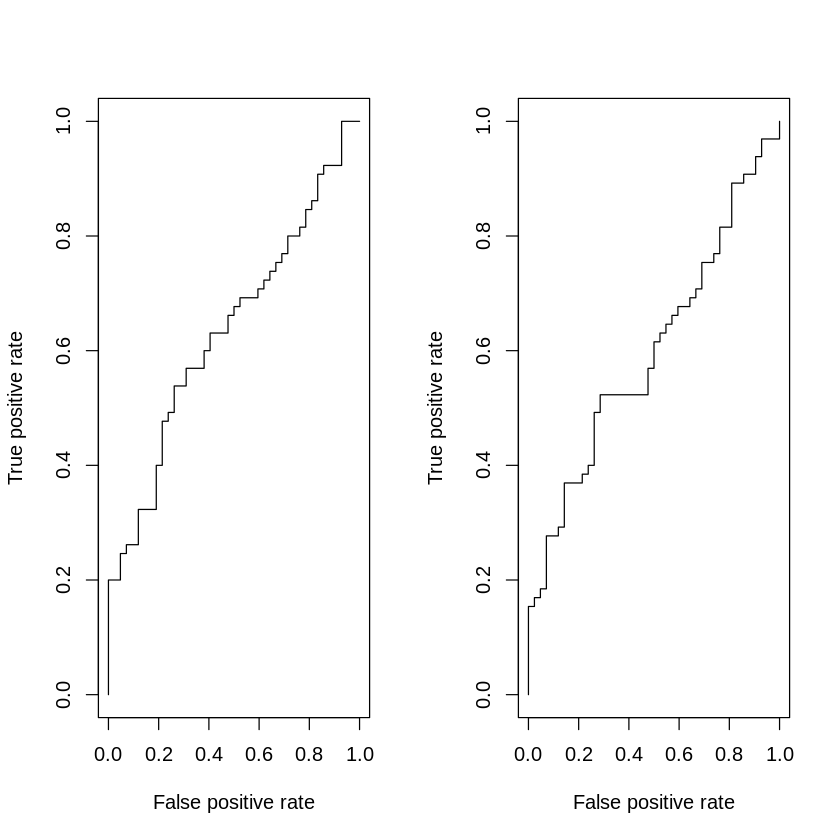

In [55]:
# Test both models using the test sets
# ```{r}
#Test both of the models using test set
test_predicted_full_model<-predict(full_model,newdata = testing,type = "response")
test_predicted_reduced_model<-predict(reduced_model,newdata = testing_reduced,type="response")
#list confusion matrix for both models
list(full_model_conf=table(testing$Problem, test_predicted_full_model>0.5)%>%prop.table()%>%round(3),
     reduced_model_conf=table(testing_reduced$Problem,test_predicted_reduced_model>0.5)%>%prop.table()%>%round(3))
#First the full model confusion metrix
table(test_predicted_full_model > 0.5,testing$Problem)
#Now the reduced model confusion metrix
# table(test_predicted_reduced_model > 0.5,testing_reduced$Problem)
# ```
# Plot the results based on the full model and reduced model
# ```{r}
#False positive dicreased
#Draw ROC Curve for both of the model
par(mfrow=c(1,2))
#Draw the ROC of the full model first (left) and then reduced model (right)
prediction(test_predicted_full_model,testing$Problem)%>%
  performance(measure = "tpr", x.measure = "fpr")%>%
  plot()
prediction(test_predicted_reduced_model,testing_reduced$Problem)%>%
  performance(measure = "tpr", x.measure = "fpr")%>%
  plot()
#Compute the area under the curve for both model
# full model AUC
prediction(test_predicted_full_model, testing$Problem) %>%
  performance(measure = "auc") %>%
  .@y.values
# Reduced model AUC
prediction(test_predicted_reduced_model, testing_reduced$Problem) %>%
  performance(measure = "auc") %>%
  .@y.values

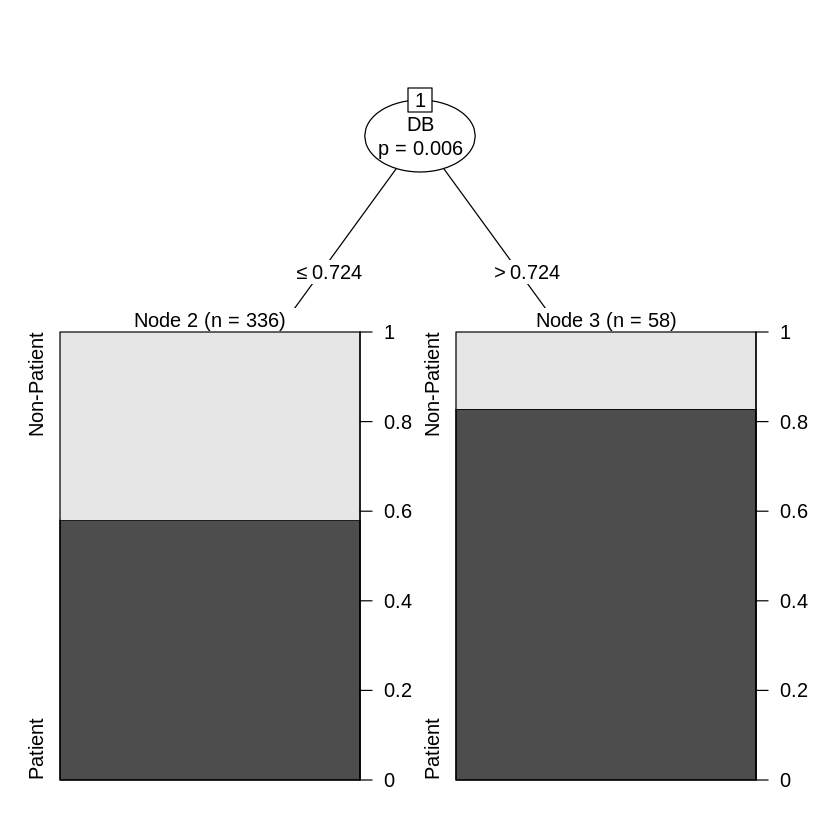

In [56]:
# ```
# See the ctree of the whole data
# ```{r}
p_load(party,stringr)
tree <- ctree(Problem~.,data=data, control=ctree_control(minbucket = 8))
plot(tree)

In [57]:
#According to Ctree the most important split happens according to Sgpt. Then Alkphos and A.G
# ```
# Decision tree prediction with the reduced set of variable and full set of variable
# ```{r}
#Build a decision tree classifier for the full model
dtree_classifier_full<-rpart(formula = Problem~.,data = training)
#Test the test set we have built earlier on that
y_pred_full<-predict(dtree_classifier_full,newdata = testing[-11],type = 'class')
#Build the decision tree classifier for the reduced model
dtree_classifier_reduced<-rpart(formula = Problem~.,data = training_reduced)
#Test the test set we have built earlier on that
y_pred_reduced<-predict(dtree_classifier_reduced,newdata = testing_reduced[-9],type = 'class')
# ```
# Now test the both model with the test set
# ```{r}
#Compute the confusion metrix to understand about type I and type II error
cm_full <- table(testing[,11],y_pred_full)
cm_full
#Compute the confusion metrix to understand about type I and type II error
cm_reduced<- table(testing_reduced[,9],y_pred_reduced)
cm_reduced

             y_pred_full
              Non-Patient Patient
  Non-Patient          12      30
  Patient              13      52

             y_pred_reduced
              Non-Patient Patient
  Non-Patient          14      28
  Patient              17      48

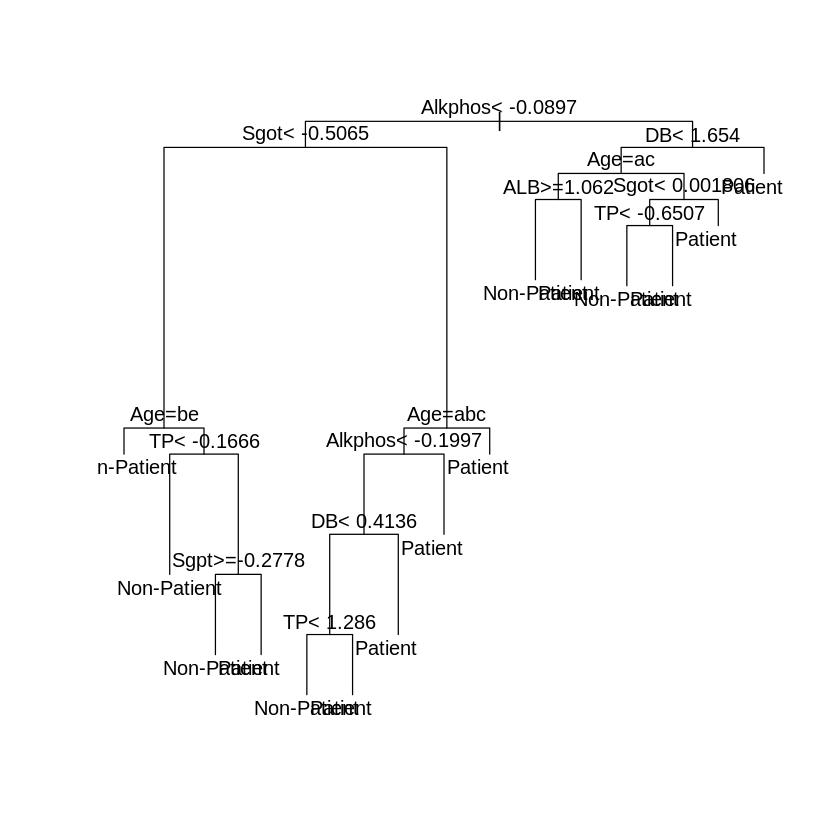

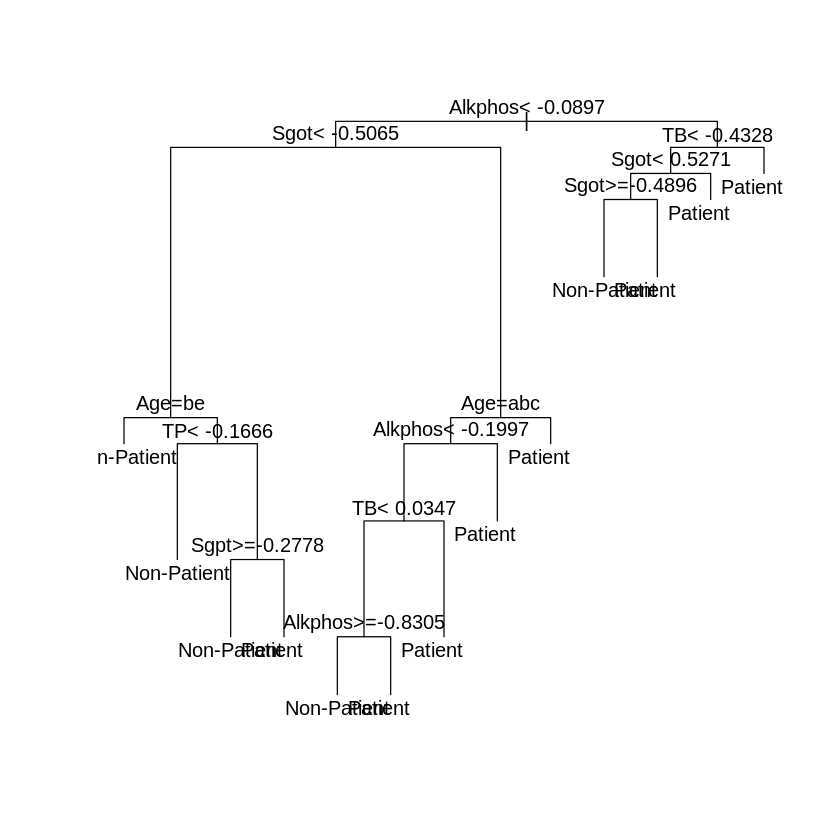

In [58]:
#Here also accuracy does not differs much. We can deduce that there is no point of using a full model with highly correlated variables
# ```
# Plot the results
# ```{r}
#Plot the decision tree for the reduced model
par(mfrow=c(1,1))
plot(dtree_classifier_reduced)
text(dtree_classifier_reduced)
#Plot the decision tree for the full model
par(mfrow=c(1,1))
plot(dtree_classifier_full)
text(dtree_classifier_full)
#Here we can also see that Alkphos and Sgot are playing important roles

In [60]:
# ```
# Now we will see some other methods which also describes variable importance but they are not in the basis of statistically significance
# ```{r}
#Check the variable importance with conditional forest
library(party)
cf1 <- cforest(Problem ~ . , data= data, control=cforest_unbiased(mtry=2,ntree=50))
varimp(cf1)

Age        Gender            TB            DB       Alkphos 
 0.0070833333  0.0104166667  0.0076388889  0.0065277778  0.0038888889 
         Sgpt          Sgot            TP           ALB           A.G 
-0.0025000000  0.0063888889 -0.0002777778 -0.0022222222 -0.0020833333

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plotrix’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’


Loading required package: Formula

Loading required package: plotmo

Loading required package: plotrix

Loading required package: TeachingDemos



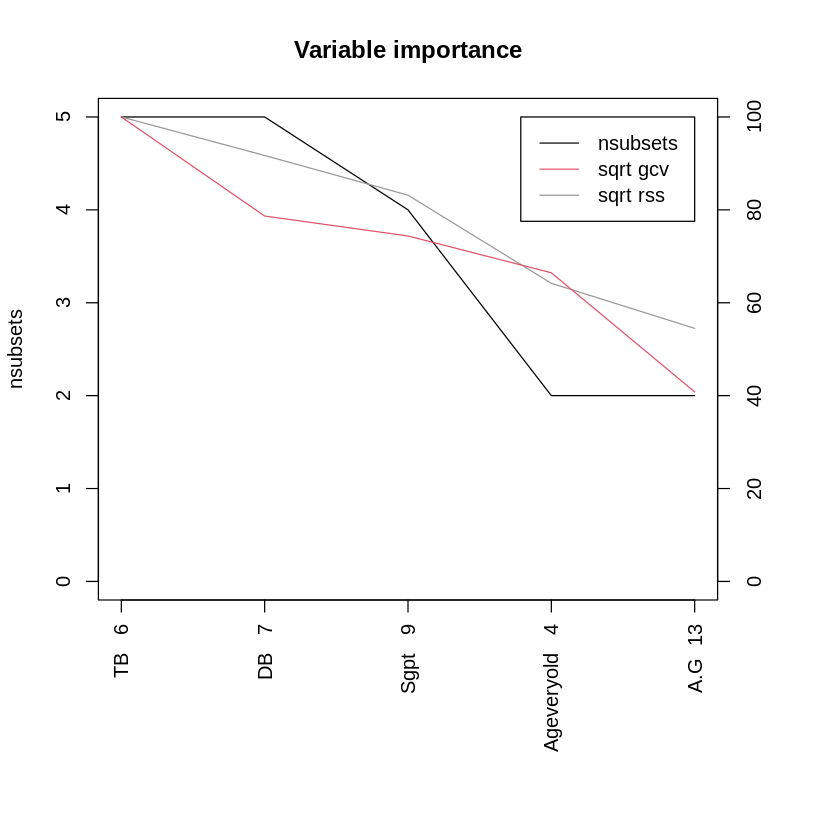

In [62]:
#See the important variable according to the mars model
install.packages("earth")
library(earth)
marsModel <- earth(Problem ~ ., data=data) # build model
ev <- evimp (marsModel)
plot(ev, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ranger’


 1. run of importance source...

 2. run of importance source...

 3. run of importance source...

 4. run of importance source...

 5. run of importance source...

 6. run of importance source...

 7. run of importance source...

 8. run of importance source...

 9. run of importance source...

 10. run of importance source...

After 10 iterations, +1.7 secs: 

 rejected 1 attribute: TP;

 still have 9 attributes left.


 11. run of importance source...

 12. run of importance source...

 13. run of importance source...

 14. run of importance source...

 15. run of importance source...

 16. run of importance source...

 17. run of importance source...

 18. run of importance source...

After 18 iterations, +3.1 secs: 

 confirmed 2 attributes: DB, TB;

 still have 7 attributes left.


 19. run of importance source...

 20. run of importance source...

 21. run

[1] "Age"     "Gender"  "TB"      "DB"      "Alkphos" "Sgot"    "A.G"    


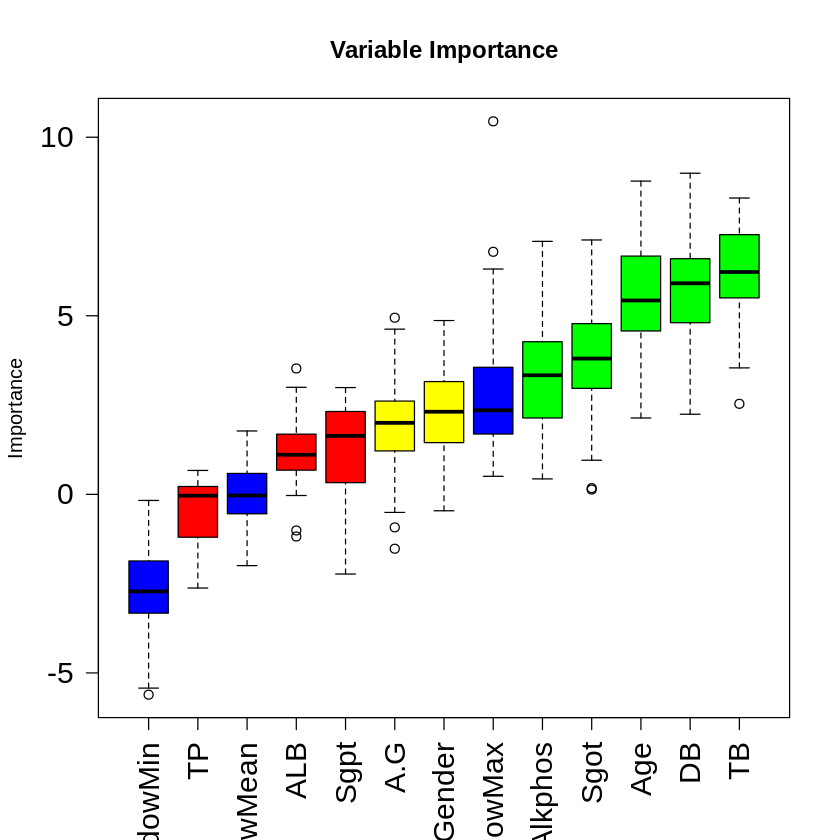

In [63]:
install.packages("Boruta")
library(Boruta)
#Plot variable importance level with BORUTA MODEL
boruta_output <- Boruta(Problem ~ ., data=data, doTrace=2)  # perform Boruta search
boruta_signif <- names(boruta_output$finalDecision[boruta_output$finalDecision %in% c("Confirmed", "Tentative")])  # collect Confirmed and Tentative variables
print(boruta_signif)  # significant variables
plot(boruta_output, cex.axis=1.5, las=2, xlab="", main="Variable Importance")

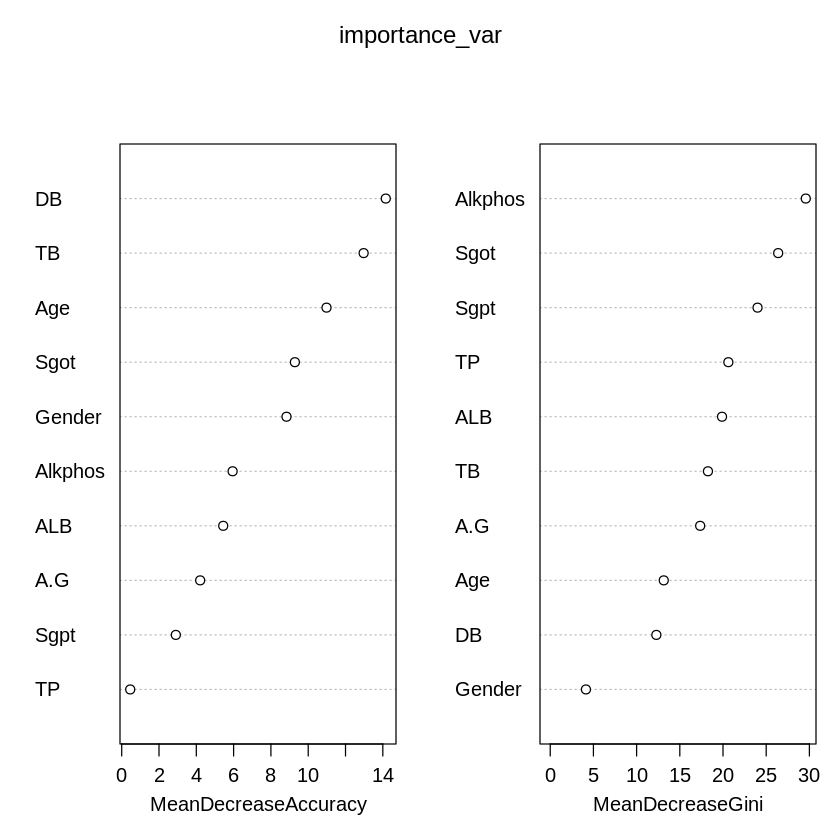

In [73]:
library(randomForest)
set.seed(4543)
#Plot variable importance level with random forest importance
importance_var <- randomForest(Problem ~ ., data=data, ntree=1000, keep.forest=FALSE,
                          importance=TRUE)
varImpPlot(importance_var)